# EXPLORATORY DATA ANALYSIS ON A DATASET

In [295]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [296]:
df=pd.read_csv('Cardiotocographic.csv')

In [297]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [298]:
df.size

29764

In [299]:
df.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [300]:
len(df.columns)

14

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [302]:
df.ndim

2

## 1.	Data Cleaning and Preparation:

In [303]:
##handling missing values

In [304]:
df.isnull().sum()


LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [305]:
df=df.dropna()

In [306]:
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

### Duplicates

In [307]:
df.duplicated().sum()

2

In [308]:
df[df.duplicated()]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1115,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1458,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


In [309]:
df.drop_duplicates(inplace=True)

In [310]:
df.duplicated().sum()

0

### outliers

In [311]:
Q3=df['LB'].quantile(0.75)
Q1=df['LB'].quantile(0.25)
IQR=Q3-Q1
LowerExtreme=Q1-1.5*IQR
UpperExtreme=Q3+1.5*IQR

In [312]:
LowerExtreme

105.0

In [313]:
UpperExtreme

161.0

In [314]:
LB_no_outliers=df[(df.LB>LowerExtreme)&(df.LB<UpperExtreme)]

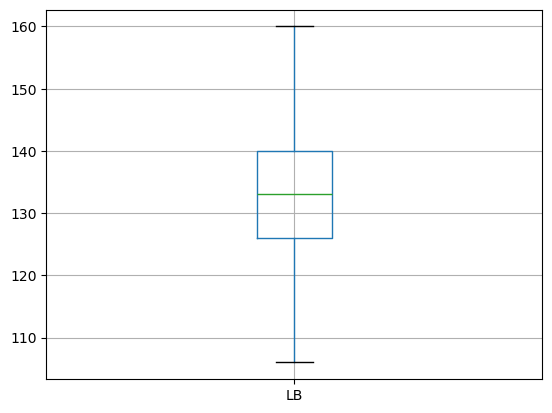

In [315]:
LB_no_outliers.boxplot('LB')
plt.show()

In [316]:
## to remove outliers from each column

In [317]:
def remove_outliers(df):
    no_outliers=df.copy()
    for column in df.columns:
        Q3=df[column].quantile(0.75)
        Q1=df[column].quantile(0.25)
        IQR=Q3-Q1
        LowerExtreme=Q1-1.5*IQR
        UpperExtreme=Q3+1.5*IQR
        no_outliers=no_outliers[(no_outliers[column]>=LowerExtreme)&(no_outliers[column]<=UpperExtreme)]
    return no_outliers
        

In [318]:
no_outliers=remove_outliers(df)
no_outliers

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1,132.000000,0.006380,0.00000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.00000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.0
4,131.948232,0.006515,0.00000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.0
37,114.000000,0.004559,0.00000,0.004559,0.003040,0.0,0.0,24.0,3.2,0.000000,16.2,134.0,0.000000,1.0
59,144.000000,0.008143,0.00000,0.006595,0.000000,0.0,0.0,33.0,1.1,-0.060411,6.2,100.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,136.000000,0.000000,0.00207,0.008282,0.000000,0.0,0.0,67.0,1.5,11.000000,4.7,38.0,0.000000,1.0
2117,140.000000,0.000000,0.00000,0.007812,0.000000,0.0,0.0,79.0,0.3,20.000000,8.5,26.0,1.002932,1.0
2118,140.000000,0.000000,0.00000,0.006470,0.000898,0.0,0.0,79.0,0.5,26.428179,7.0,21.0,1.000000,1.0
2119,140.000000,0.000000,0.00000,0.006764,0.001127,0.0,0.0,79.0,0.6,27.000000,6.4,26.0,1.000000,1.0


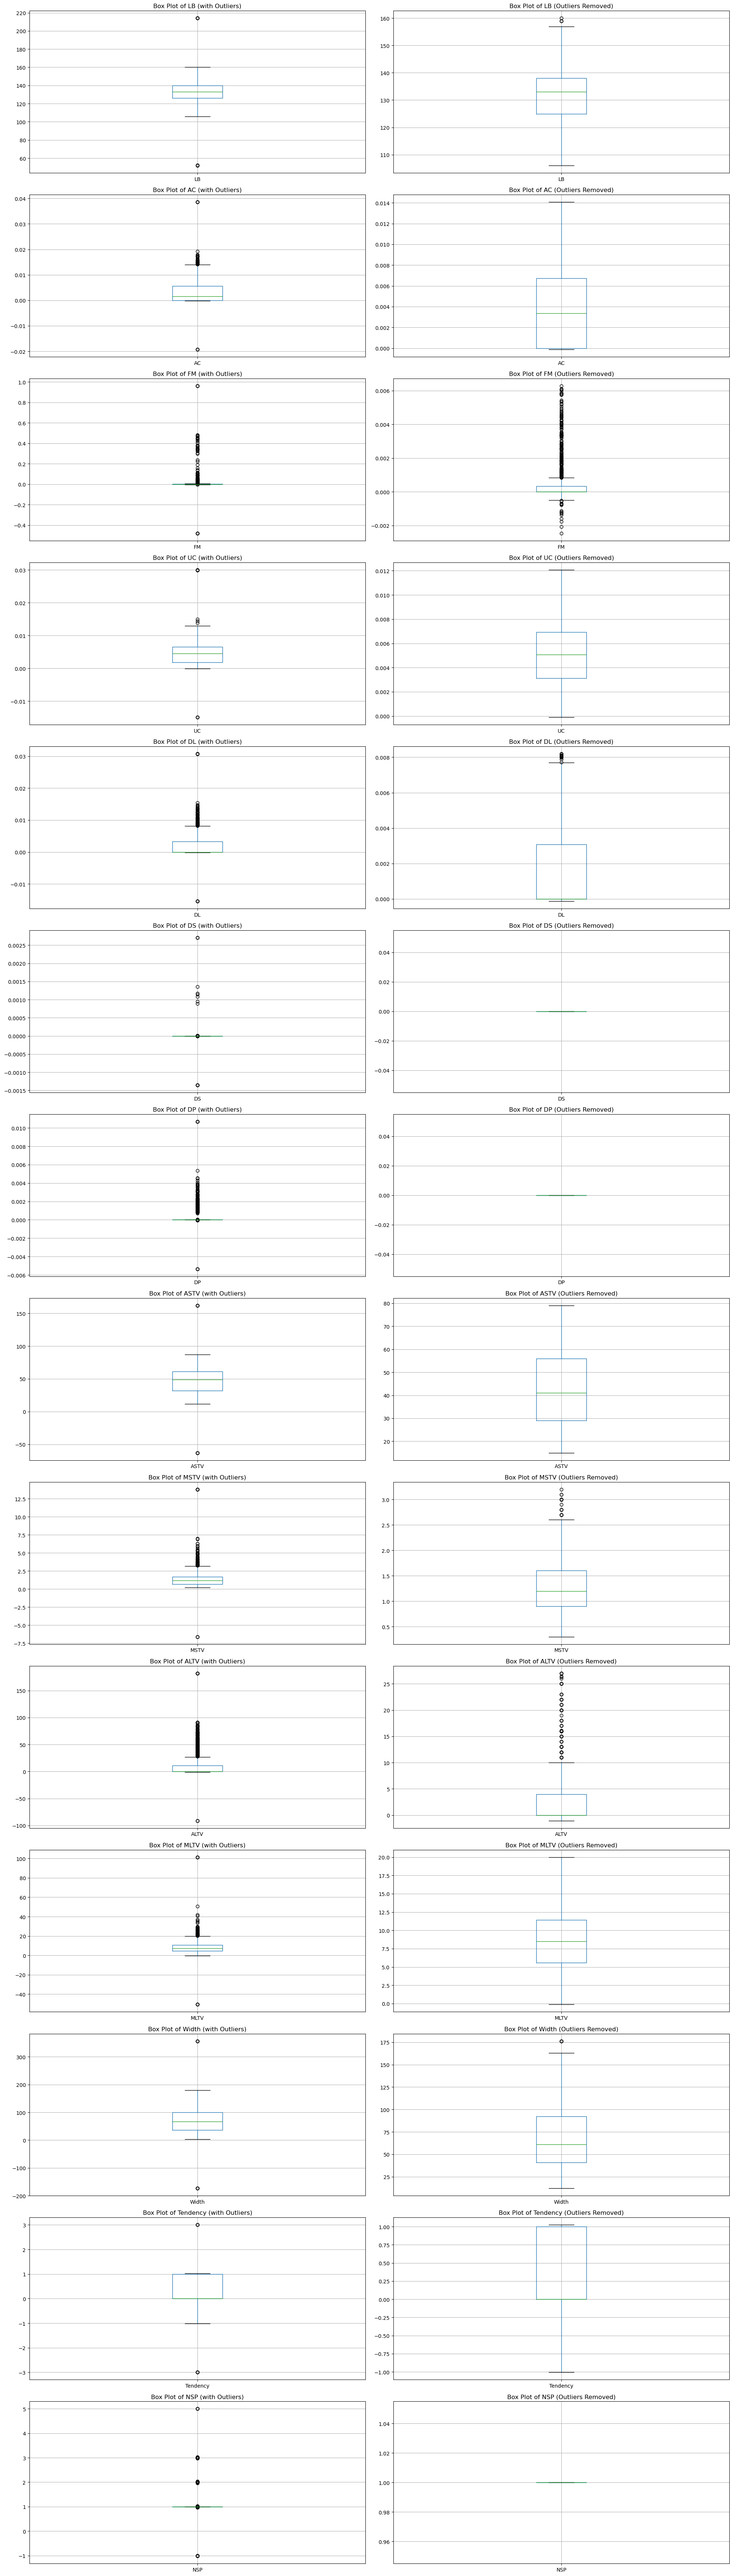

In [319]:
 plt.figure(figsize=(20, 5 * len(df.columns)))
for i, column in enumerate(df.columns):
    # Original data with outliers
    plt.subplot(len(df.columns),2,2*i + 1)
    df.boxplot(column=[column])
    plt.title(f'Box Plot of {column} (with Outliers)')

    # Data with outliers removed
for i, column in enumerate(no_outliers.columns):
    plt.subplot(len(df.columns),2,2*i + 2)
    no_outliers.boxplot(column=[column])
    plt.title(f'Box Plot of {column} (Outliers Removed)')
plt.tight_layout()
plt.show()

In [320]:
df_new=no_outliers
df_new

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1,132.000000,0.006380,0.00000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.00000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.0
4,131.948232,0.006515,0.00000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.0
37,114.000000,0.004559,0.00000,0.004559,0.003040,0.0,0.0,24.0,3.2,0.000000,16.2,134.0,0.000000,1.0
59,144.000000,0.008143,0.00000,0.006595,0.000000,0.0,0.0,33.0,1.1,-0.060411,6.2,100.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,136.000000,0.000000,0.00207,0.008282,0.000000,0.0,0.0,67.0,1.5,11.000000,4.7,38.0,0.000000,1.0
2117,140.000000,0.000000,0.00000,0.007812,0.000000,0.0,0.0,79.0,0.3,20.000000,8.5,26.0,1.002932,1.0
2118,140.000000,0.000000,0.00000,0.006470,0.000898,0.0,0.0,79.0,0.5,26.428179,7.0,21.0,1.000000,1.0
2119,140.000000,0.000000,0.00000,0.006764,0.001127,0.0,0.0,79.0,0.6,27.000000,6.4,26.0,1.000000,1.0


## 2.	Statistical Summary:

In [321]:
for column in df:
    print(f'{column}:')
    print('mean: %.2f' % df[column].mean())
    print('median:',round(df[column].median()))
    print('standard deviation:',round(df[column].std()))
    print('mode:',df[column].mode()[0])
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    print(f'IQR:{IQR:.2f}')
    print('\n')

LB:
mean: 133.34
median: 133
standard deviation: 11
mode: 133.0
IQR:14.00


AC:
mean: 0.00
median: 0
standard deviation: 0
mode: 0.0
IQR:0.01


FM:
mean: 0.01
median: 0
standard deviation: 0
mode: 0.0
IQR:0.00


UC:
mean: 0.00
median: 0
standard deviation: 0
mode: 0.0
IQR:0.00


DL:
mean: 0.00
median: 0
standard deviation: 0
mode: 0.0
IQR:0.00


DS:
mean: 0.00
median: 0
standard deviation: 0
mode: 0.0
IQR:0.00


DP:
mean: 0.00
median: 0
standard deviation: 0
mode: 0.0
IQR:0.00


ASTV:
mean: 47.01
median: 49
standard deviation: 19
mode: 65.0
IQR:29.00


MSTV:
mean: 1.36
median: 1
standard deviation: 1
mode: 0.8
IQR:1.00


ALTV:
mean: 10.36
median: 0
standard deviation: 21
mode: 0.0
IQR:11.00


MLTV:
mean: 8.28
median: 7
standard deviation: 8
mode: 0.0
IQR:6.30


Width:
mean: 70.46
median: 67
standard deviation: 43
mode: 39.0
IQR:63.00


Tendency:
mean: 0.32
median: 0
standard deviation: 1
mode: 0.0
IQR:1.00


NSP:
mean: 1.30
median: 1
standard deviation: 1
mode: 1.0
IQR:0.00




### summary

##### LB(FHR)
 * Mean is 131.84,Median is 133.0
 * the most frequent value is 122.0 as it is the mode
 * std is 9.45 indicating there is moderate variability around the mean

##### AC
  * The Mean.Median,Mode,std deviation are all essentially same ,centered around with no variability

##### FM
similar to AC all the statistical analysis are essentially same 

##### UC, DL, DP ,DS 
* For all these variables, the mean, median, and mode are very close to zero. Additionally, the standard deviation is also zero
##### ASTV
* The data has a moderate spread around the mean 42.39
* the standard deviation is 15,there is moderate variability
* the most frequent value is 58.0

##### MSTV (mean value of short-term variability):
* Mean :1.27,Median:1.20
* The mode is at 0.90, indicating a frequent occurrence of this value.
* STD is 0.54, indicating moderate variability in short-term variability
##### ALTV (percentage of time with abnormal long-term variability):
* Mean: 3.17, Median: 0.00
* The mode is at 0.00, suggesting that most values are 0.
* STD is 6.04, indicating significant variability, potentially due to a large number of 0 values.
##### MLTV (mean value of long-term variability):
* Mean: 8.60, Median: 8.50
* The mode is at 0.00, indicating a peak occurrence at this value.
* STD is 4.49, indicating moderate variability in long-term variability.
##### Width (width of FHR histogram):
* Mean: 67.85, Median: 61.00
* The mode is at 39.00, indicating a frequent occurrence of this value.
* STD is 32.60, suggesting considerable variability in FHR histogram widths.
##### Tendency (histogram's tendency):
* Mean: 0.34, Median: 0.00
* The mode is at 0.00, indicating a peak occurrence at this value.
* STD is 0.59, suggesting variability in the histogram's tendency.
##### NSP (fetal state class code):
* Mean, Median, and Mode are all 1.00, indicating that the dataset may be skewed towards one class.
* STD is 0.00, indicating no variability, which seems unlikely and might require further investigation.
##### Conclusion
* These findings provide valuable insights into the distribution and characteristics of each variable in the dataset.



## 3.Data visualization

#### Histogram

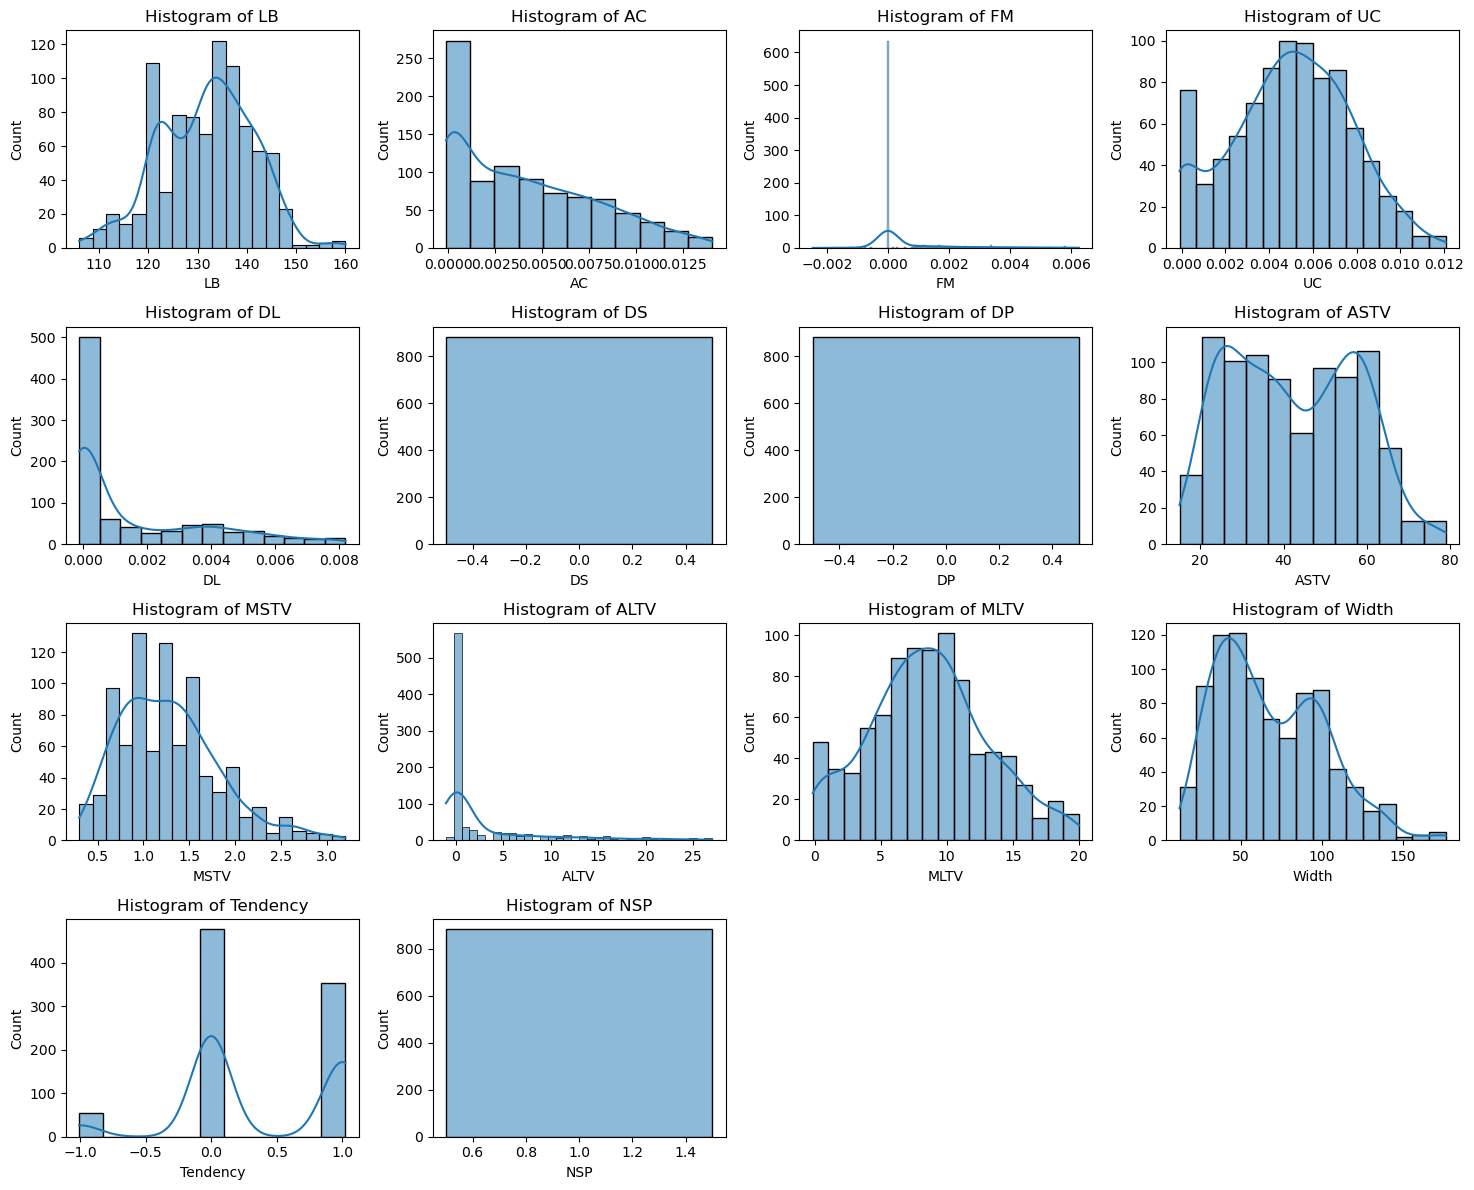

In [322]:
plt.figure(figsize=(15,12))
for i, column in enumerate(df_new.columns):
    plt.subplot(4,4,i+1)
    sns.histplot(df_new[column],kde=True) 
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

    

#### scatter plot

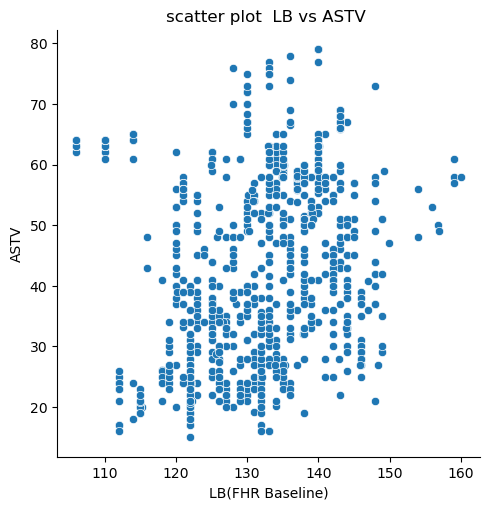

In [323]:
sns.relplot(data=df_new,x='LB',y='ASTV',kind='scatter')
plt.title('scatter plot  LB vs ASTV ')
plt.xlabel('LB(FHR Baseline)')
plt.ylabel('ASTV')
plt.show()

#### Violin map

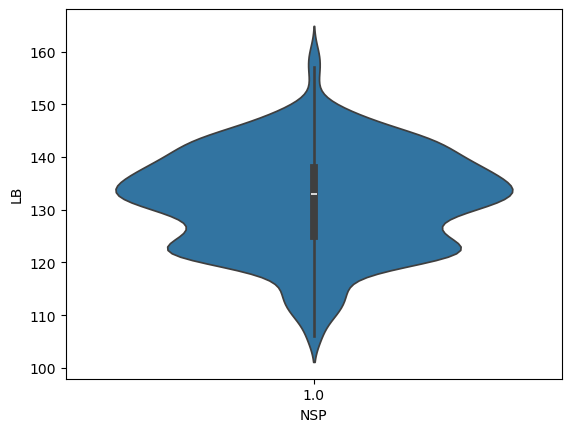

In [324]:
sns.violinplot(data=df_new,x='NSP',y='LB')
plt.show()

#### Correlation Heat map

In [325]:
corr=df_new.corr()

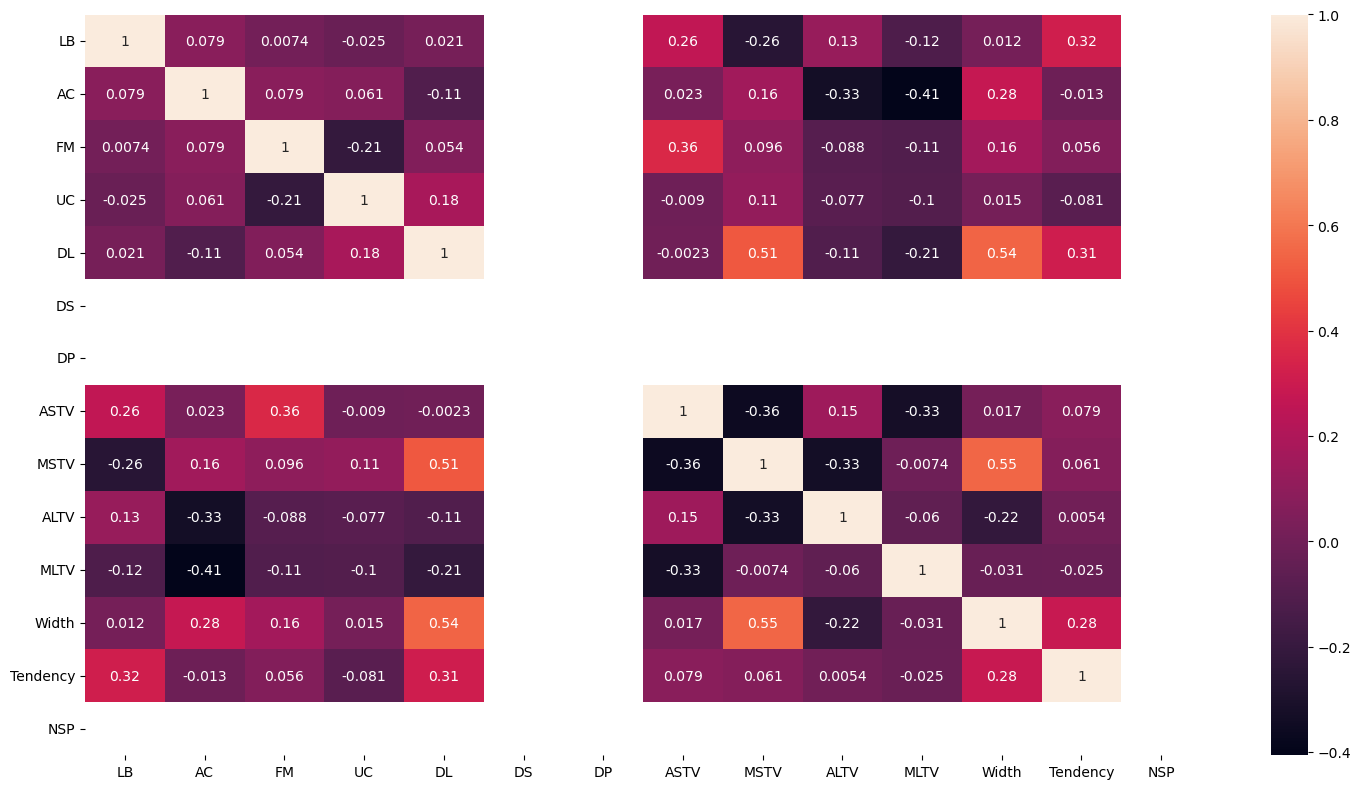

In [326]:
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)
plt.tight_layout()
plt.show()

## 4. Pattern recognition and Insights

In [327]:
correlation_matrix=df_new.corr()
correlation_matrix

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,0.078903,0.007398,-0.024515,0.021143,NaN,NaN,0.263654,-0.257599,0.125431,-0.118223,0.012460,0.316824,NaN
AC,0.078903,1.000000,0.079045,0.061236,-0.106525,NaN,NaN,0.023129,0.157435,-0.329621,-0.406259,0.276576,-0.013242,NaN
FM,0.007398,0.079045,1.000000,-0.213064,0.054073,NaN,NaN,0.361807,0.096368,-0.087823,-0.108722,0.161887,0.055835,NaN
UC,-0.024515,0.061236,-0.213064,1.000000,0.176229,NaN,NaN,-0.009019,0.110824,-0.077222,-0.102677,0.015404,-0.080524,NaN
DL,0.021143,-0.106525,0.054073,0.176229,1.000000,NaN,NaN,-0.002311,0.507796,-0.106325,-0.210455,0.540358,0.312391,NaN
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTV,0.263654,0.023129,0.361807,-0.009019,-0.002311,NaN,NaN,1.000000,-0.357028,0.145913,-0.326251,0.016585,0.078525,NaN
MSTV,-0.257599,0.157435,0.096368,0.110824,0.507796,NaN,NaN,-0.357028,1.000000,-0.333706,-0.007351,0.546642,0.061174,NaN
ALTV,0.125431,-0.329621,-0.087823,-0.077222,-0.106325,NaN,NaN,0.145913,-0.333706,1.000000,-0.059871,-0.217053,0.005426,NaN


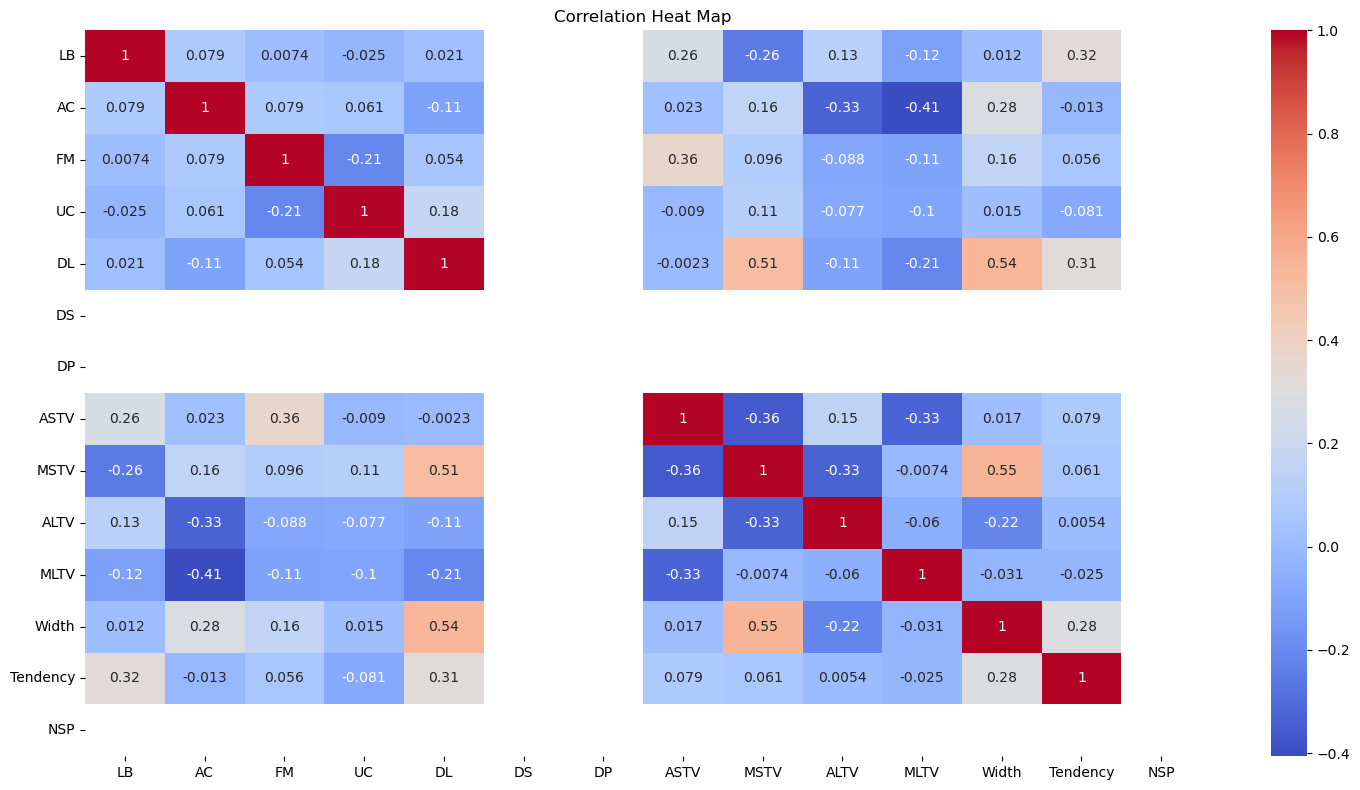

In [328]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heat Map',)
plt.tight_layout()
plt.show()

### key observations:
* LB (FHR baseline) has a moderate positive correlation with ASTV (percentage of time with abnormal short-term variability) and Tendency. This suggests that as the FHR baseline increases, the percentage of abnormal short-term variability also tends to increase.
* LB has a moderate negative correlation with MSTV (mean value of short-term variability). This indicates that as the FHR baseline increases, the mean value of short-term variability tends to decrease.
* DL (percentage of time with abnormal long-term variability) has a strong positive correlation with Width (width of FHR histogram), suggesting that as the percentage of time with abnormal long-term variability increases, the width of the FHR histogram also tends to increase.
* DL also has a moderate positive correlation with LB and Tendency, indicating that these variables tend to increase together.
* ALTV (percentage of time with abnormal long-term variability) has a moderate negative correlation with AC (accelerations per second), MLTV (mean value of long-term variability), and Width. This suggests that as the percentage of time with abnormal long-term variability increases, the number of accelerations per second, the mean value of long-term variability, and the width of the FHR histogram tend to decrease.
* These correlations provide valuable insights into the relationships between different variables in the dataset, which can inform further analysis and decision-making processes. 


## 5. Conclusion

#### Through the exploratory analysis, several key insights and patterns have been uncovered:

* Variable Relationships: The correlation matrix revealed various relationships between different variables in the dataset. For example, LB (FHR baseline) showed correlations with other variables such as ASTV (percentage of time with abnormal short-term variability) and DL (percentage of time with abnormal long-term variability), indicating potential dependencies between these factors.
* Tendencies: The Tendency variable showed correlations with LB and DL, suggesting potential trends or patterns in fetal heart rate characteristics over time.
* Abnormal Variability: Variables related to abnormal short-term and long-term variability (ASTV, DL, ALTV) demonstrated correlations with other parameters, indicating potential associations between abnormal variability and other fetal heart rate characteristics.
* Impact on Decision-making: These findings could impact decision-making in various ways. For example:
* Healthcare professionals could use these insights to identify patterns or trends in fetal heart rate characteristics that may indicate fetal distress or other medical conditions.
* Researchers could use the identified relationships to develop predictive models for fetal health outcomes based on fetal heart rate monitoring data.
* Medical device manufacturers could use these insights to improve the design of fetal monitoring devices and algorithms for detecting abnormal patterns in fetal heart rate data.
##### Further Analysis: 
* Investigating the underlying causes of the observed relationships between variables.
* Exploring additional factors that may influence fetal heart rate characteristics, such as maternal health status or gestational age.
* Validating the findings through longitudinal studies or clinical trials.
* Overall, the insights gained from exploratory analysis provide valuable information for understanding fetal heart rate characteristics and their potential implications for fetal health monitoring and clinical